In [1]:
%matplotlib inline

# Classification of Handwritten Digits

## Data Mining Team Names:
David Samuel

This notebook will explore a number of different models to classify the MNIST Handwritten Dataset.  You can get started with the dataset and benchmarks at https://www.kaggle.com/c/digit-recognizer.  

We will use the CRISP-DM framework seen below to iterate the data processing and modeling.  You can get a breif overview here: https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining

<a title="By Kenneth Jensen (Own work) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ACRISP-DM_Process_Diagram.png"><img width="384" alt="CRISP-DM Process Diagram" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/512px-CRISP-DM_Process_Diagram.png"/></a>

<a id="top"></a>
## Table of Contents
________________________________________________________________________________________________________

### I.  Business Understanding
* <a href="#business_understanding">Business Understanding</a>

### II. Data Understanding 
* <a href="#data_understanding">Data Understanding</a>

### III. Data Preparation
* <a href="#data_preparation">Data Preparation</a>
* <a href="#final_dataset">Final Dataset Description</a>

### IV. Modeling and Evaluation
* <a href="#modeling_and_evaluation">Modeling and Evaluation</a>

#### Using PCA on Logistic Regression and SVM Models
* <a href="#using_pca">Using PCA on Logistic Regression and SVM Models</a>

#### Supervised Learning: Support Vector Machine (SVM)
* <a href="#support_vector_machine">Supervised Learning: Support Vector Machine (SVM)</a>

### V.  The Big Picture: Deployment
* <a href="#deployment">Deployment</a>
________________________________________________________________________________________________________

<a id="business_understanding"></a>
<a href="#top">Back to Top</a>
# I.  Business Understanding

This dataset was released and licensed for use in academia, and a purely knowledge based Kaggle competition which started in July, 2012, and will conclude at New Years Eve December, 2016.

The data was taken from the MNIST ("Modified National Institute of Standards and Technology").  This data has been extensively studied, which makes it an ideal candidate for learning machine learning techniques, repeatablility of testing, and new learning methodology.

The goal of the competition is to correctly classify the handwritten digits 0 through 9.  It is our job to process the image data, train a model using the training data, predict the labels of the test set, and report the accuracy.  We will iterate on this methodology through the use of various machine learning algorithms, and data transformations. 

<a id='data_understanding'></a>
<a href="#top">Back to Top</a>
# II.  Data Understanding


This dataset is comprised of a training set of 42,000 labeled images, and 28,000 test images.  These images are each unique, and each contains 784 pixels, 0 through 255 representing a greyscale pixel.  The training set is labeled with the correct digit in the set of (0 through 9), while the testing set is unlabeled.  

In [2]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

import pandas as pd   # import pandas library as a variable, "pd"
import numpy as np    # import numpy library as "np"

print("Importing...")
# create data frame of training and testing sets

test = pd.read_csv("https://dl.dropboxusercontent.com/s/rhxn9alnnexqa75/test.csv?raw=1")              #  Sets testing object as a DataFrame
dataset = pd.read_csv("https://dl.dropboxusercontent.com/s/xb2xkaiwxelx55g/train.csv?raw=1")             #  Set training object as a DataFrame
target = dataset[[0]].values.ravel()                #  Set target as the label values flattened to an ndarray(N-dimensional Array)                                            
train = dataset.iloc[:,1:].values                   #  Set train as the pixel values

print("Done!...")

Importing...
Done!...


## Here's a sample of the digits from Kaggle:
<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3004/logos/front_page.png" alt="Drawing" style="width: 400px;"/>

<a id='class_distribution'></a>
<a href="#top">Back to Top</a>
### Class Distribution 
The below graph shows the frequency of digits that occured in the data set. 

Size of the training dataset: 42000 Rows and 785 Columns
Size of the testing dataset: 28000 Rows and 784 Columns
Number of unique classes: 10
The Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


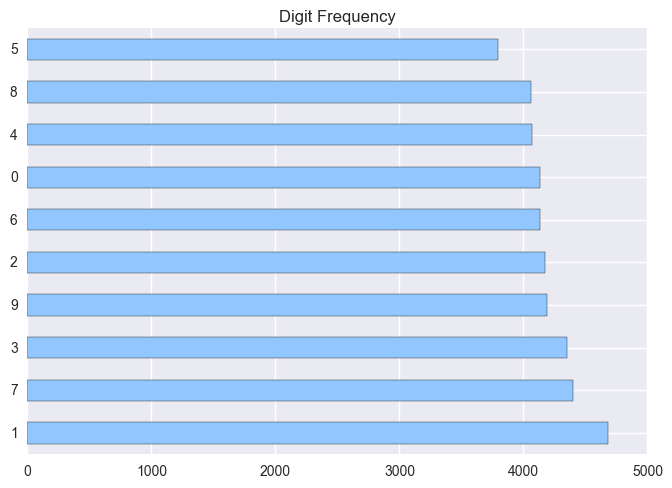

In [3]:
# http://seaborn.pydata.org/generated/seaborn.set.html?highlight=seaborn.set#seaborn.set

# seaborn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
import matplotlib.pyplot as plt
import seaborn as sns       # import the seaborn library for a quick distribution plot
sns.set(color_codes=True)       # Reset color_codes to default

print 'Size of the training dataset:', dataset.shape[0], 'Rows and', dataset.shape[1], 'Columns'  #shape[0,1] = row, col
print 'Size of the testing dataset:', test.shape[0], 'Rows and', test.shape[1], 'Columns'
print 'Number of unique classes:', len(dataset.label.unique())
labels = sorted(dataset.label.unique())                              #sort unique labels
print 'The Classes:', labels
sns.set(style='darkgrid', palette='pastel')       # Set grid style and color palette of seaborn object
c = pd.Series(target)                             # Create a series of the target labels
c = c.value_counts()                              # Set value_counts for the classes
sns = c.plot(title="Digit Frequency", kind='barh')  # set seaborn object equal to Series.plot object and it will plot automatically
plt.show()                                        # Show plot cleanly



### The plot above shows the distribution of the labeled classes in the training Set
We can see from the graph above that the most common digit is 1 and occurs just under 5000 times. this will be taken into account in later sections.

<a id='data_preparation'></a>
<a href="#top">Back to Top</a>
# III. Data Preparation

## Split the data into training and testing and show the distribution of the split
Now the data set must be split in order to help determine how the distribution would correlate to the cross validation test. the grap below shows the output.

We will use train_test_split to partition the data 50/50 and stratified kfolds for cross validation as this was observed as the most common methodology for this competition.

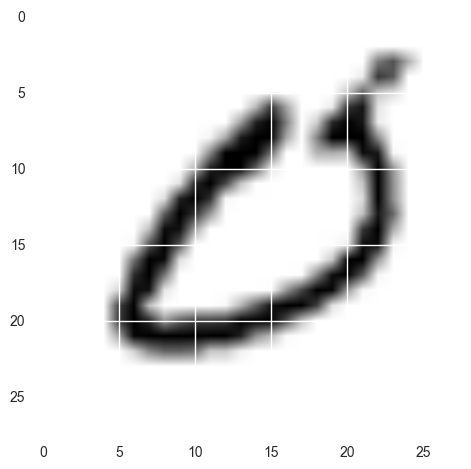

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# convert to array, specify data type, and reshape
targets = target.astype(np.uint8)
trains = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
tests = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

plt.imshow(trains[1729][0], cmap=cm.binary) # draw the picture

plt.show()

# Below we plot the various number plots in order to show what the images actually look like. 


In [8]:
%matplotlib inline
# The function below plots the images with their labels above
# Code sampled from ../03.%20Dimension%20Reduction.ipynb

import matplotlib.pyplot as plt    #import pylab library which is suited for plotting images

# Set X and y to plot
X = train
y = target
names = np.sort(dataset.label.unique())     # Created sorted labels array to match titles with images
done = set()                                # Create and empty set of explored indices

#  Create function to plot single digit of interest
def plot_now(images, h=28, w=28, cmap=plt.cm.binary, indx=True, r=0):    # Set default constructor values  
    plt.imshow(images.reshape((h, w)), cmap=cmap)                        # Reshape images and set cmap color
    if indx==True:
        plt.xlabel('index: '+str(r), size=12)                  # Option to show index
        plt.title(names[y][r], size=16)                                      # Sets title from sorted names [y] and index [r] 
    plt.xticks(())                              # Eliminate tick marks
    plt.yticks(())

#  Create function to plot a gallery of interest
def plot_gallery(images, titles,  h=28, w=28, n_row=3, x=1.7, y=2.3, n_col=6, 
                 cmap=plt.cm.binary, random=True, indx=True, r=0, size=16):  
    # Optional row and size parameters will allow us to reuse code, set random to false and r to an index of your choice
    # to see a continous gallery

    plt.figure(figsize=(x * n_col, y * n_row))                          # Set figure size as a ratio of rows
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) # Adjust spacing of subplots
    for i in range(n_row * n_col):                                         # Adjust spacing of subplots
        move=True                  # logical to move on if a random int is found not in the done set()                                       
        while random and move:      
            r=(np.random.randint(len(images)-(n_row*n_col)-1))          # Create a random integer no greater than the size of the set, and gallery
            if r not in done:                                        # if integer has not been used 
                done.add(r+i)                                       # add to set
            move=False          # Optional randomization to explore sets
        plt.subplot(n_row, n_col, i + 1)                        # create subplot for each
        plt.imshow(images[i+r].reshape((h, w)), cmap=cmap)      # plot images reshaped to 28*28
        if indx==True:plt.xlabel('index: '+str(i+r), size=12)   # print index if True
        plt.title(titles[i+r], size=size)                       # print label
        plt.xticks(())
        plt.yticks(())   # remove ticks




### Using the plot_gallery()  function we can now plot a random gallery, or an individual image or array of images plot_now() function will plot a single digit.


# Take a look at the colormapping guide

http://matplotlib.org/users/colormaps.html

# The cmap, cool color scheme more clearly defines the centers and edges of the shapes, as well as blobs.
Now that the pictures are more obvious with a more distinguishable color scale it can be dertemined that the centers and edges are more well defined

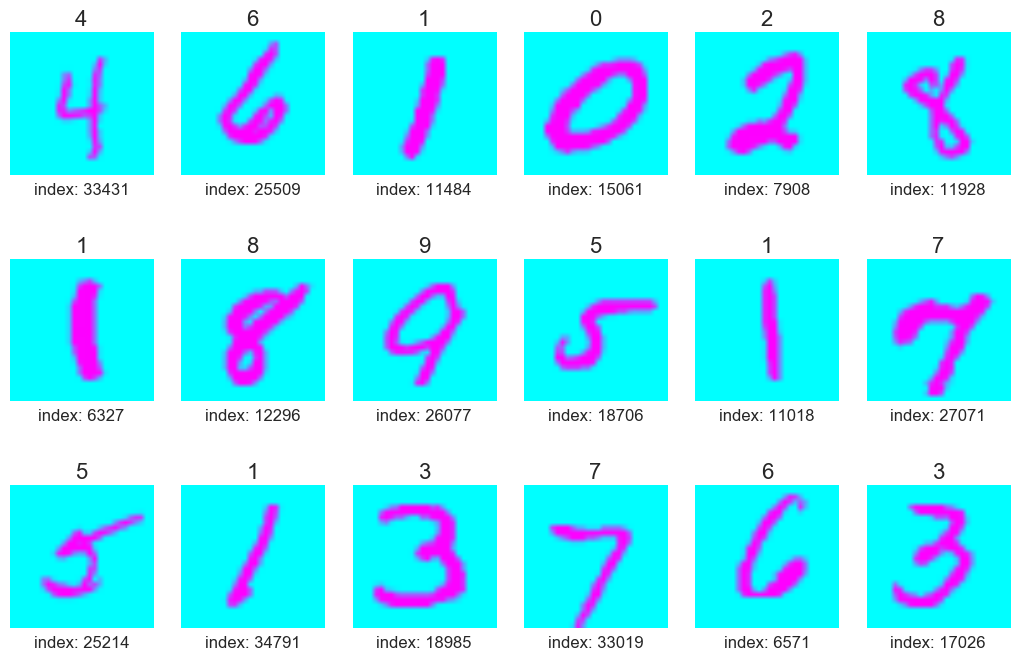

In [9]:
plot_gallery(X, names[y], 28, 28, indx=True, random=True, cmap=plt.cm.cool)

# Pick out an image that looks weird  and plot it below

Inferno cmap has been able to show some weird features

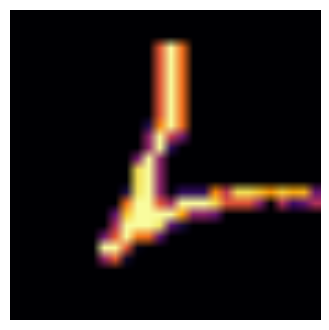

In [10]:
N=17972
plot_now(X[17972], cmap=plt.cm.inferno, indx=False)

# Using a mask we can reduce the dimensionality of the data

In [11]:
# mask the black pixels
black = np.ma.masked_where(X <= 230, X)

# black = black.compressed()
# blacks = black.reshape(42000, 784).astype(np.uint8).ravel()

# Now take a closer look at an image of interest recreated from the mask to match the original color.  All that is left is a skelaton of the actual writing.

Perhaps these images could be reprocessed into shape data to be trained with

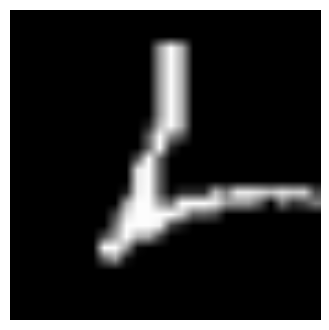

In [12]:

plot_now(X[N], cmap=plt.cm.gray, indx=False, r=N)

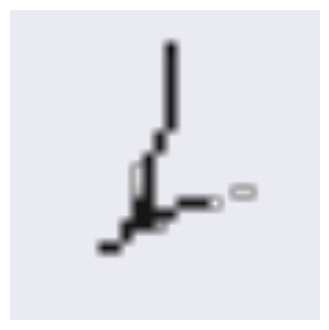

In [13]:
weird = set()  # empty set of strange images
N=17972       #
plot_now(black[N], cmap=plt.cm.binary, indx=False, r=N)
plt.savefig('img/'+str(N)+'.png', transparent=True, bbox_inches='tight', pad_inches=-0.15) # Save image

<img src="img/17972.png">

# Compared with the original, this digit has become more recognizeable through the masking, at least in making its most distinguishing feature more pronounced.

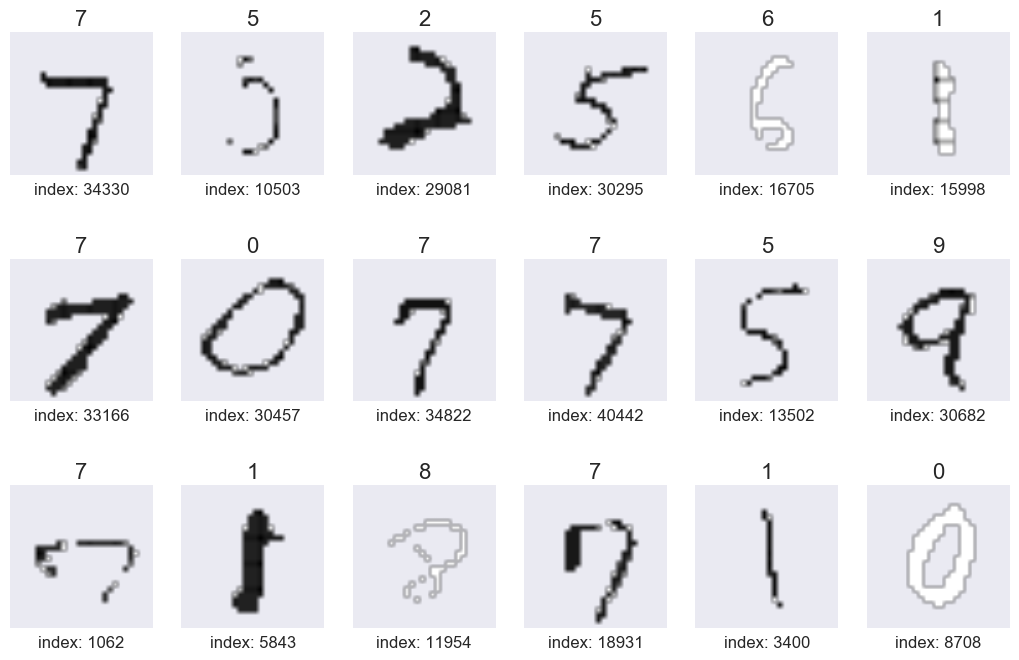

In [14]:
plot_gallery(black, names[y],  h=28, w=28, n_row=3, x=1.7, y=2.3, n_col=6, 
                 cmap=plt.cm.binary, random=True, indx=True, r=0, size=16)

# Above are random images recreated from the mask at levels of black above 230, as you can see the images have become very simplified, in some cases, over-lossy, but could provide a better training set for the neural nets.

<a id='final_dataset_description'></a>
<a href="#top">Back to Top</a>

# Final Dataset Description:

We will use a combination of transformed datasets, including the original training and testing sets, the train_test_split sets used in cross-validation, and the PCA transformed dataset which will create n=50 variables.



<a id='modeling_and_evaluation'></a>
<a href="#top">Back to Top</a>
# IV.  Modeling and Evaluation

The next necessary function for this data set is to determine which of the components are most important. To do this a PCA is performed.

 We will then use a variety of classification techniques, report on their accuracy, modify the parameters, and iterate this process until we find a stable, reproducable method that achieves high accuracy with relatively low training times.
 
 We will use a logistic regression classifier with cross validation using 2 different models, and compare the accuracies, and plot a confusion matrix.
 We will also train a support vector machine classifier with a 4 different kernels and compare accuracy of each.
 In addition, both a ball_tree and kd_tree classifier will be used and accuracy reported.
 
 Finally, a random forest classifier will be used as a benchmark for future neural nets to be run.

## 1) Evaluation Metrics

Cross validation of the training set will be used to measure the predictive power of each model. For the purpose of digit classification, we will use sklearn's metrics library to score each classification as either true or false.  We will also use a confusion matrix function to identify classes that are being incorrectly predicted.  The goal is 100% percent accuracy in prediction of all digit classes (or reduce the total number of false predictions generated from the model), therefore precision, and other metrics will not be used in this analysis. 

In [15]:
# Code adapted from 
# http://scikit-learn.org/stable/_downloads/plot_confusion_matrix.py


from datetime import datetime as dt; start = dt.now()
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

# Create confusion matrix function to plot errors in predictions
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Automatically created module for IPython interactive environment


## 2) Dividing the data

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split  
# We will try the method train_test_split instead of ShuffleSplit because it was suggested by a number of Kagglers

print("Importing...")
# create data frame of training and testing sets
train = pd.read_csv("https://dl.dropboxusercontent.com/s/rhxn9alnnexqa75/test.csv?raw=1")
y = train[[0]].values.ravel()                  # Set y equal to label values, ravel strips extra dimensional array 
X = train.iloc[:,1:].values                    # Set X equal to pixels

print("splitting...")                          # distribute 4 sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                    y, test_size=0.5)  # create X and y training and testing sets

# Use a 50/50 split with a stratified kfold
print("Done!")


Importing...
splitting...
Done!


## Stratified k-fold cross-validation 
will be used for the Support vector machine and logistic regression models to avoid over-fitting by stratifying the resampling across 10 folds, each of the 10 classes should be able to be captured evenly.

In [17]:
# Used guidance per Kaggle, Data Mining Lectures, and Sklearn documentation
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

# Choose 10 splits with shuffling to thoroughly randomize the training cases

# Classification Task 1

classify the digits in the training set

## Model 1 - Logistic regression

In [18]:
# Let's try reducing dimensionality with PCA to 50 components 
# as we have seen from the eigenvectors from lab 1, 50 should be sufficient
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform
# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
# svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.decomposition import PCA

print("Fitting PCA...")
n_comp = 50

# whitening was recommended, as well as arpack solver

pca = PCA(n_components=n_comp, whiten=True, svd_solver='arpack')  # Create PCA object

# Set fitted PCA object
trainer = pca.fit_transform(X_train)  # fit and transform the pca model in one operation
tester = pca.fit_transform(X_test)

print("Done!")

Fitting PCA...
Done!


In [19]:
 def pca_plot(X, n_comp, svd_solver='auto', cmap=plt.cm.viridis, scaler=1.0):   # create a plotter function for PCA

    plot_gallery(eigendigits, eigendigit_titles, n_row=int(np.floor(np.sqrt(n_comp))),   # set gallery size to number of PCA to scaler
                 n_col=int(np.ceil(np.sqrt(n_comp))), x=(1.7*scaler), y=(2.3*scaler), 
                 indx=False, random=False, cmap=cmap, size=(16*scaler))

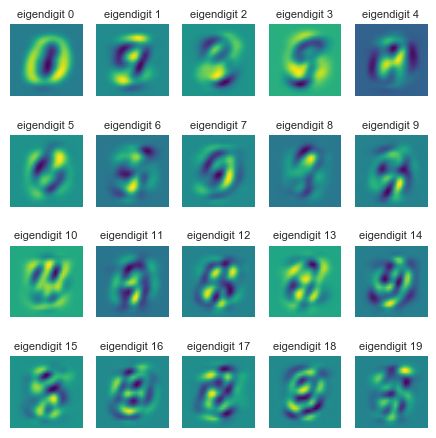

In [20]:
try:
    eigendigits = pca.components_.reshape((n_comp, 28, 28))    # set eigenvalues 
    eigendigit_titles = ["eigendigit %d" % i for i in range(eigendigits.shape[0])]  #create the labels
    pca_plot(train, 20, scaler=0.5)
except IndexError:
    pass

### The plot above shows the first 20 eigendigits

The first 10 eigendigits resemble the following digits: 0, 3, 8, 9
After digit 10 they begin to lose form.
These will be the most important to train accurately.

In [21]:
evr = pca.explained_variance_ratio_         # call evr on the PCA object to get the variance explained by each PC
print round(sum(evr)*100), "Percent Variance Explained by", n_comp, 'PCs'

# Create cumulative series to plot
cum = 0
d = []
evr = pca.explained_variance_ratio_

for i in range(n_comp):  
    cum += evr[i]
    d.append(cum)

83.0 Percent Variance Explained by 50 PCs


From the output output we  can see that the variance is explained by the top 50 principal components, which is a fairly large percentage.

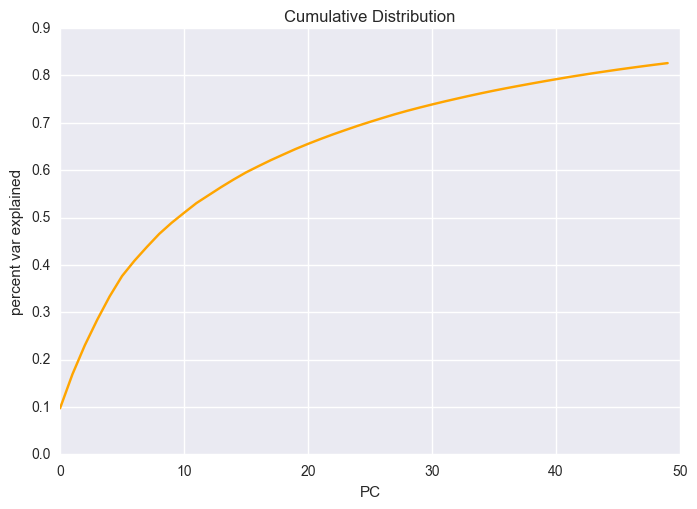

In [22]:
sns.set(style='darkgrid')
plt.plot(d, color='orange', label=True)
plt.title('Cumulative Distribution')
plt.xlabel('PC')
plt.ylabel('percent var explained')
plt.show()

## Plotting the variance
We can see from the distibution chart above that neearly 80% of the variance is explaied by the top 40 and 65% of the variables are explained by the top 20 PCs

Sag Solver... Fitting Logit... predicting...
Accuracy is 36.3904761905 %
8 CPUs Ran in 0:01:52.905000 minutes
Confusion matrix, without normalization
[[1782    2   38   18   10   80   27   27   58   15]
 [   0  313    3  105  125   20   12 1440   10  298]
 [  34    6 1096   43  289   12  114  146   76  222]
 [  17    3   28  583  201  132   35  471  125  591]
 [   3  171  756  283   77  178  101    3  481   14]
 [  63   99   32  121  103 1038   89  127  127  108]
 [  26    9  313    6   46   17 1624    5    7    5]
 [  12  169  401 1165    4  154    1  132   94   24]
 [  17   10  161  118  240  163   39  120  970  260]
 [   6  258  484  685   19  135    6   23  464   27]]


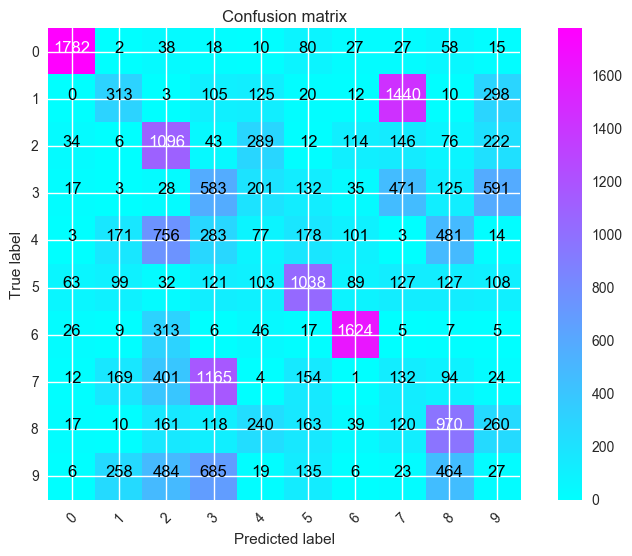

In [23]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics as mt
from datetime import datetime as dt
import multiprocessing

start = dt.now()
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants

c = LogisticRegressionCV(Cs=10, 
                              fit_intercept=True, cv=skf, 
                              n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.00001, 
                              class_weight=None, 
                              verbose=0, refit=True, 
                              intercept_scaling=1.0, multi_class='multinomial')
print("Sag Solver..."),
print("Fitting Logit..."),
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy is', mt.accuracy_score(y_test,y_hat)*100, '%'

print multiprocessing.cpu_count(), 'CPUs Ran in', dt.now() - start, 'minutes' 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

## Model 2 - SVC

Support Vector Machine Classifier with a radial basis function

Training SVM... Predicting...
Accuracy 42.4857142857 %
CPU Time:  0:00:25.949000
Confusion matrix, without normalization
[[1872    0   41   16   12   31   12   11   52   10]
 [   0  771    9   42  684    1    8  587   31  193]
 [  16    1 1293   30  288    7  121   75   96  111]
 [  40    1   52  666  171   91   27  410  127  601]
 [   7   53  552  325  101  148   44    3  811   23]
 [  42   10   63  134   83 1234   54  112  105   70]
 [  28    1  366   22   42   44 1537    3   11    4]
 [  22  124  520 1120    8   63    1  148  123   27]
 [   8    4  137  223  167  117   20   52 1220  150]
 [  14  125  353  656   43   95    3   17  721   80]]


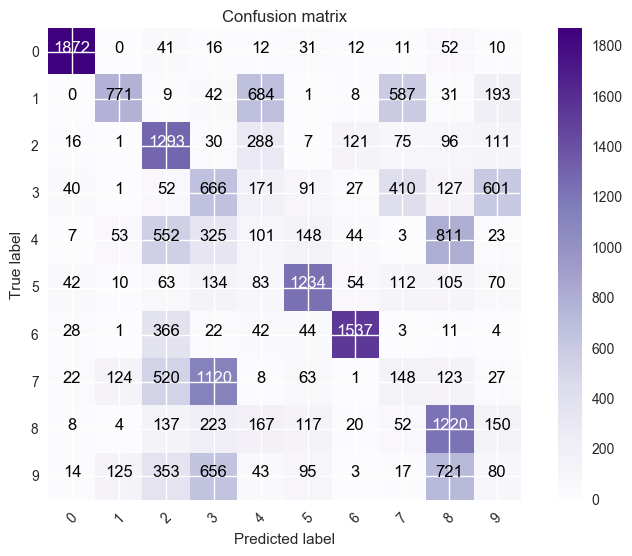

In [24]:
from sklearn.svm import SVC
from sklearn import metrics as mt

# rbf kernel 
start = dt.now()
s = SVC(C=1.0, kernel='rbf', tol=0.00001, cache_size=200, decision_function_shape='ovr')
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Purples)

## Model 3 - KNN using a ball tree algorithm

Fitting ball_tree
ball_tree accuracy: 0.961285714286
CPU Time:  0:04:09.046000
Confusion matrix, without normalization
[[2042    1    3    0    0    4    5    1    0    1]
 [   0 2310    6    1    0    0    2    4    1    2]
 [  22   30 1939    2    1    1    4   35    1    3]
 [   1   10   14 2107    2   21    1   15    6    9]
 [   2   26    0    0 1977    0    4    6    0   52]
 [   7    6    0   45    5 1802   23    4    4   11]
 [  10    3    1    0    3   10 2030    0    1    0]
 [   0   34    5    1    4    0    0 2096    0   16]
 [   9   35    8   41   12   44   12    8 1904   25]
 [  12    9    3   16   30    4    2   46    5 1980]]


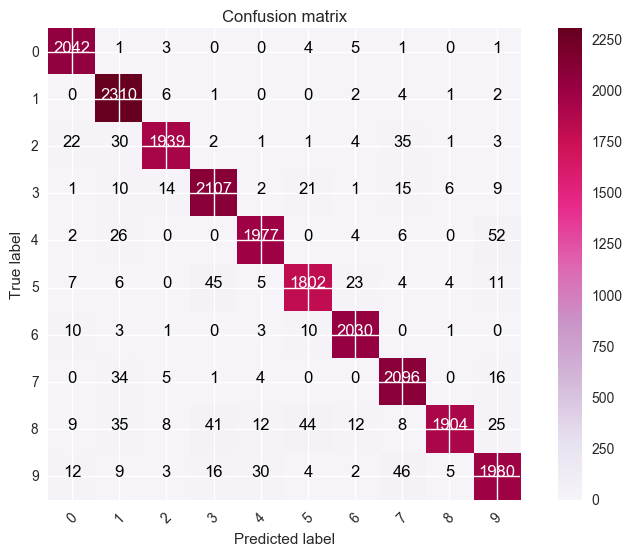

In [25]:
from sklearn.neighbors import KNeighborsClassifier
start = dt.now()

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', p=2, n_jobs=-1)  # default is n_neighbors=5, stick with it for training
print 'Fitting', 'ball_tree'
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print 'ball_tree accuracy:', mt.accuracy_score(y_hat,y_test)
print 'CPU Time: ', dt.now() - start

conf1 = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf1, [x for x in range(10)],
                  normalize=False,
                  title='Confusion matrix',
                  cmap=plt.cm.PuRd)


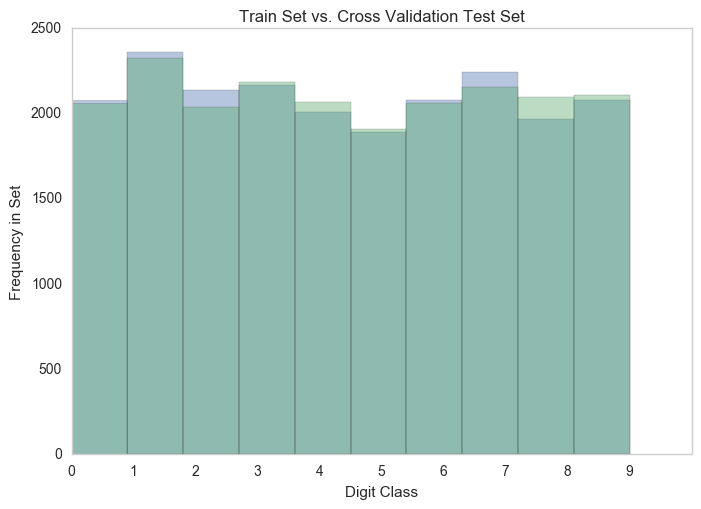

In [26]:
# Create plotter for train_test_split to visualize distributions of multiple sets at once
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)            # reset colors

def splitter_display(train, test):                          # split display function
    sns.color_palette("Blues")
    sns.color_palette("husl", 8)
    sns.set_style("whitegrid", {'axes.grid' : False})       # white grid, no lines
  
    ax = sns.distplot(train, bins=10, hist=True, kde=False)      # class distribution of sets
    ax = sns.distplot(test, bins=10, hist=True, kde=False)
    ax.set(title="Train Set vs. Cross Validation Test Set", xlabel='Digit Class', ylabel='Frequency in Set', xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.show() 
    
splitter_display(y_train, y_test)

### The Plot above shows differences in frequencies of the split in colored sections.  If the distribution appears normal, then it is ready for testing.

### The frequency of the split looks normal, ie. no noticable difference in color distribution above the bars.  

Note: This may not need to be run each time, as the train_test_split ensures a balanced class distribution

In [27]:
# from the tutorial: http://www.kaggle.com/c/datasciencebowl/details/tutorial

def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss
print("multiclass_log_loss() method loaded..")

multiclass_log_loss() method loaded..


From the below graph we can see that the accuracy of this PCA is around .83 which is respectable but not perfect. We can also see that the log loss from this method is about 5.6 and fairly consistent between the 2 tests.

In [28]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier()

print 'Training Once:'
# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

print 'Training Again:'

# train the decision tree algorithm
dt_clf.fit(trainer,y_train)
yhat = dt_clf.predict(tester)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

Training Once:
Accuracy: 0.837095238095
Log Loss: 5.62653114509
Training Again:
Accuracy: 0.286904761905
Log Loss: 5.62653114509


# The results above show that PCA reduce the accuracy of a Decision tree dramatically, so it won't be used for randomforest or any other tree.

<a id='using_pca'></a>
<a href="#top">Back to Top</a>
# Using PCA

From the graph below we do see a higher log loss and lower accuracy when performing this decision tree classifier but that is expected.

For the below it was determined that we should only use the Gini criterion, as entropy is too sensitive for this type of image classification

Training Once:
Accuracy: 0.58019047619
Log Loss: 1.2578482244


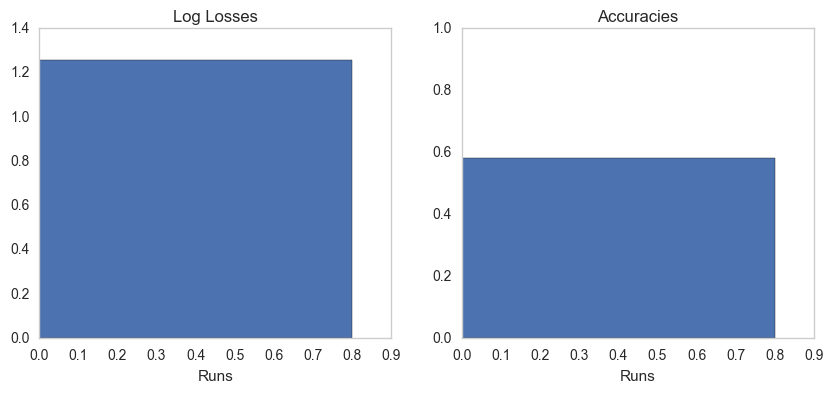

In [29]:
log_losses = []
accuracies = []
params = []

from matplotlib import pyplot as plt
%matplotlib inline

# how to make it generalize a bit better? 
# dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#  max_features=None, random_state=None, max_leaf_nodes=None, 
#  min_impurity_split=1e-07, class_weight=None, presort=False)
# defaults
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=1000, min_samples_leaf=100, 
                                max_features='auto', max_leaf_nodes=None)

# # overwrite with prepruning methods
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
#                                 min_samples_split=1000, min_samples_leaf=1, 
#                                 max_leaf_nodes=None)


print 'Training Once:'

# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

# get accuracy and log loss of this training
acc = mt.accuracy_score(y_test,yhat)
ll = multiclass_log_loss(y_test, class_probabilities)
print 'Accuracy:', acc
print 'Log Loss:', ll

# save accuracy, log loss, and params of run
log_losses.append(ll)
accuracies.append(acc)
params.append(dt_clf.get_params())
sns.set_style("whitegrid", {'axes.grid' : False})  
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(len(log_losses)),log_losses)
plt.title('Log Losses')
plt.xlabel('Runs')

plt.subplot(1,2,2)
plt.bar(range(len(accuracies)),accuracies)
plt.title('Accuracies')
plt.xlabel('Runs')
plt.ylim([0,1])

plt.show()

## Model 2 -  Multinomial Sag Logit

Sag Solver... Fitting Logit... predicting...
Accuracy is 36.3904761905 %
8 CPUs Ran in 0:01:56.033000 minutes
Confusion matrix, without normalization
[[1782    2   38   18   10   80   27   27   58   15]
 [   0  313    3  105  125   20   12 1440   10  298]
 [  34    6 1096   43  289   12  114  146   76  222]
 [  17    3   28  583  201  132   35  471  125  591]
 [   3  171  756  283   77  178  101    3  481   14]
 [  63   99   32  121  103 1038   89  127  127  108]
 [  26    9  313    6   46   17 1624    5    7    5]
 [  12  169  401 1165    4  154    1  132   94   24]
 [  17   10  161  118  240  163   39  120  970  260]
 [   6  258  484  685   19  135    6   23  464   27]]


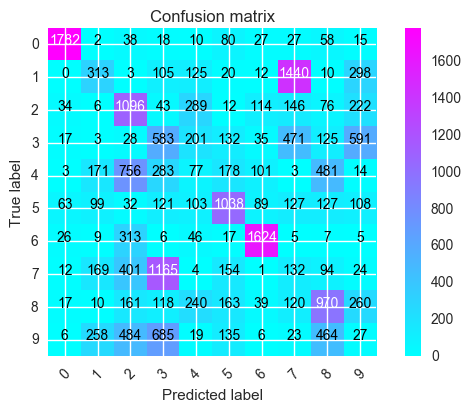

In [30]:
from datetime import datetime as dt
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics as mt
import multiprocessing
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, 
# penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, 
# n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

start = dt.now()

# l2 regulariazation only works with 'multinomial' and solvers: ‘sag’, and ‘lbfgs’
# using 10 fold cross validation

c = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=skf, n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.00001, class_weight=None, 
                              verbose=0, refit=True, intercept_scaling=1.0, multi_class='multinomial')


print("Sag Solver..."),
print("Fitting Logit..."),
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy is', mt.accuracy_score(y_test,y_hat)*100, '%'

print multiprocessing.cpu_count(), 'CPUs Ran in', dt.now() - start, 'minutes' 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

# prob = c.predict_proba(tester)
# print 'Probabilities', prob
# print 'maximum probability', np.max(prob)


# Predictive Probablities were not noted, as we are more focused on confusion amongst classifications, and not the predictive power of any one of the classes.
The plot above shows high confusion with 1, 2 and 7, and is under predicting 5 and 9.  Class weights may improve accuracy 

# Multinomial lbfgs logit

lbfgs Solver... Fitting Logit... predicting...
Accuracy 36.219047619 %
CPU Time:  0:01:27.731000
Confusion matrix, without normalization
[[1782    0   43   19   12   80   22   26   57   16]
 [   0  271    2  108  103   14   12 1531   10  275]
 [  35    1 1094   48  282   15  116  142   74  231]
 [  19    3   26  568  203  132   34  474  121  606]
 [   3  190  772  277   60  162  111    2  478   12]
 [  65   78   32  126  102 1060   86  133  121  104]
 [  29    2  298    7   53   19 1633    4    9    4]
 [  10  162  382 1187    4  161    1  134   91   24]
 [  17    8  161  116  237  164   36  121  979  259]
 [   6  358  484  648   13  117    7   20  429   25]]


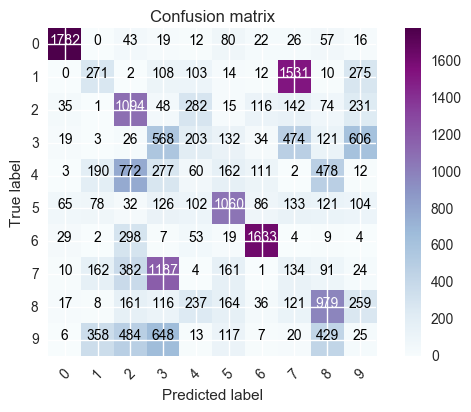

In [31]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn import metrics as mt

# Will try lbfgs
start = dt.now()

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

c = LogisticRegressionCV(solver='lbfgs', cv=skf, penalty='l2', 
        multi_class='multinomial', tol=0.00001)


print("lbfgs Solver..."),
print("Fitting Logit..."),
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu)

# prob = c.predict_proba(tester)
# print 'Probabilities', prob
# print 'maximum probability', np.max(prob)

When the tests above were being performed it was realized that the data was possibly consistent of too many variables, as it took quite some time to perform the log regrssion and other features. With that it was determined that a PCA for dimension reduction would be of great use to this project.

The code below is pulled from a Kaggler, and provides functions for a PCA and logistic regression model that is over 90% accurate.

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

<a id='support_vector_machine'></a>
<a href="#top">Back to Top</a>
# Support Vector Machines (SVM)



# Polynomial Kernel

Training SVM... Predicting...
Accuracy 37.319047619 %
CPU Time:  0:00:31.500000
Confusion matrix, without normalization
[[1417   11   41   73   52  146   18   98  155   46]
 [   0  995    2    3  348    1    1    8    7  961]
 [   6   12  926   51  423    9   57  161  103  290]
 [   5    5   19  631  170   66    9  316   92  873]
 [   0  136  255  489  254  102    4    2  620  205]
 [  16   24    7  107  149 1000   26  130  156  292]
 [   7   19  417   22  139  121 1067   14   29  223]
 [   8  249  252 1051    7   66    0  224  137  162]
 [   2   12   43  167  216  111    5   62 1072  408]
 [   4   76  159  663   82   88    1   34  749  251]]


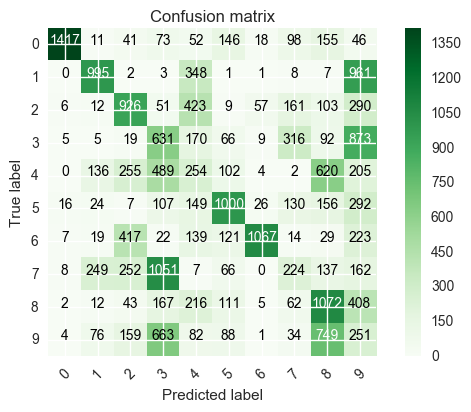

In [32]:
# Reuse X and y from PCA from above
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

# (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

# adding max_iter or balancing slows things down and hurts accuracy, so leave it at defaults, and


start = dt.now()
s = SVC(C=0.5, kernel='poly', degree=3, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train)                              # train using PCA data

print("Predicting...") 
y_hat = s.predict(tester)                            # set the predictions for scoring

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
time = dt.now() - start
print 'CPU Time: ', time


 
conf = mt.confusion_matrix(y_test,y_hat)           # Create Confusion matrix
# prob = c.predict_proba(tester)
# print 'Probabilities', prob   
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


# The CM above shows confusion with 5-0 and underpredicting 5, 4-9, 1-9, and 7-9.  

These classes will have to be examined more closely, and potentially weighted if SVM is to be used.

<a id='linear_kernel'></a>
<a href="#top">Back to Top</a>
# Linear Kernel


Training SVM... Predicting...
Accuracy 37.8047619048 %
CPU Time:  0:00:13.996000
Confusion matrix, without normalization
[[1816    0   50   19    9   57   14   14   53   25]
 [   0  480    7   36  737    2    5  935   13  111]
 [  58    3 1221   31  319   10   96  100   40  160]
 [  38    3   49  644  195  135   31  463  132  496]
 [   8  236  678  293   64  161  191    7  422    7]
 [  64   50   48  188   74 1095   77  169   57   85]
 [  46    4  327   29  124   42 1458    7   12    9]
 [  10  239  406 1167    4  110    3  128   67   22]
 [  21   10  135  242  176  125   31  162  993  203]
 [  11  397  411  587   23   75   19   20  524   40]]


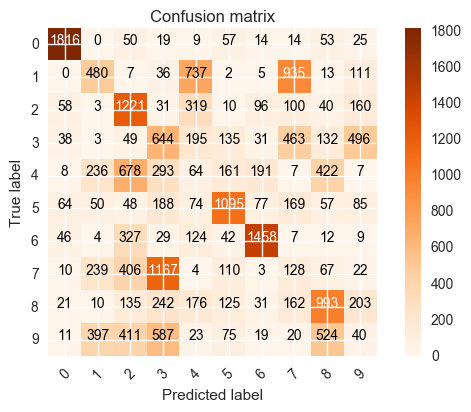

In [ ]:
# Linear Kernel with tolerance upped by order of magnitude
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

start = dt.now()
weights1 = {0:.05,1:.15, 2:0.05, 3:0.125, 4:0.125, 5:0.1, 6:0.1, 7:0.15, 8:0.1, 9:0.05}
s = SVC(C=0.5, kernel='linear', tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
# prob = c.predict_proba(tester)
# print 'Probabilities', prob 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)


## The linear kernel shows underclassifying 9 and 5 with a confusion on 4-9.  Similar issues are being encountered with 9 and 4, with 9 now underpredicted.



<a id='rbf'></a>
<a href="#top">Back to Top</a>
# Radial Basis Function Kernel

<a id='sigmoid'></a>
<a href="#top">Back to Top</a>
# Sigmoid Kernel


In [ ]:
# sigmoid kernel 
start = dt.now()
s = SVC(C=0.5, kernel='sigmoid', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
# prob = c.predict_proba(tester)
# print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.YlGn)

Training SVM...

# SVM with the 'rbf' solver outperforms the linear and polynomial, and sigmoid as well as the logit due to its multidimensional flexibility, and since the digits are drawn with distances from the center of the image, radial distance is used for modeling.

Adjusting much of the tolerance and penalty parameters had little effect on the accuracies.

# Each of these SVM and Logit classifiers have very similar  accuracy, but are highly unstable due to PCA.  Though, without PCA, the original dimensionality of the image data is too high for these methods in the current implementation.  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model import SGDClassifier

# we create 1000 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = SGDClassifier(n_iter=100, alpha=0.01)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()

# The code above plots the coefficients of a Stochastic Gradient Decent Classifier, showing the value of using class weights versus not using weights.

This information may be used to revisit SVM with weighted classes in the future.

# Random Forest Benchmark

The code below is used as a starting point for future implementations of neural nets.  Currently, our team does not possess a Linux machine with a GPU card.  Once acquired, packages lasagne, and tensorflow will be used to train a highly accurate model able of achieving over 99%. 

#Code adapted from https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# create the training & test sets, skipping the header row with [1:]
dataset = pd.read_csv("data/train.csv")
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv("data/test.csv").values

# create and train the random forest
# multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
print("Fitting...")
rf.fit(train, target)
pred = rf.predict(test)

np.savetxt('data/submission_rand_forest.csv', np.c_[range(1,len(test)+1),pred], 
           delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

print 'CPU Time: ', dt.now() - start
print("Benchmark Created!")

# Reloading Data

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

print("Importing...")
# create data frame of training and testing sets
trains = pd.read_csv("https://dl.dropboxusercontent.com/s/rhxn9alnnexqa75/test.csv?raw=1.csv")
y = trains[[0]].values.ravel()
X = trains.iloc[:,1:].values

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # create x and y training set

print("Done!")

from sklearn.decomposition import PCA

print("Fitting PCA...")
n_comp = 50
pca = PCA(n_components=n_comp, whiten=True, svd_solver='arpack')

# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)
print("Done!")

<a id='random_forest'></a>
<a href="#top">Back to Top</a>
# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from datetime import datetime as dt

start=dt.now()
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)  # 100 estimators has seen the most success
print("Fitting...")
%time rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)
conf = mt.confusion_matrix(y_test,y_hat)
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
plot_confusion_matrix(conf, [x for x in range(10)],
                  normalize=False,
                  title='Confusion matrix',
                  cmap=plt.cm.RdPu)

# By popular demand, the random forest is the best performer with ~96% accuracy and very little training time.

Decision trees are the most powerful models for this data because they are the best classifiers.  Random forest is the best among the D trees because it controls overfitting and uses bootstrap averaging to improve its accuracy.  The Convolutional Neural Net: https://www.kaggle.com/kobakhit/digit-recognizer/digit-recognizer-in-python-using-cnn, and tensorflow: https://www.kaggle.com/kakauandme/digit-recognizer/tensorflow-deep-nnwill use this benchmark to achieve 98 and 99% accuracy.  We will build on the work of these other Kagglers to improve on their accuracies by adjusting parameters and performing some preprocessing in future installments of the MNIST handwritten digits exploration.

<a id='ball_tree'></a>
<a href="#top">Back to Top</a>
# Ball Tree

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start = dt.now()

knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', p=2, n_jobs=-1)  # default is n_neighbors=5, stick with it for training
print 'Fitting', 'ball_tree'
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print 'ball_tree accuracy:', mt.accuracy_score(y_hat,y_test)
print 'CPU Time: ', dt.now() - start


In [ ]:
conf1 = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf1, [x for x in range(10)],
                  normalize=False,
                  title='Confusion matrix',
                  cmap=plt.cm.PuRd)

<a id='kd_tree'></a>
<a href="#top">Back to Top</a>
# KD Tree

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
start = dt.now()
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', n_jobs=-1)  # p=2 euclidean vs p=1 manhattan
print 'Fitting kd_tree'                                                         # n_neighbors=5 by default, doubling improved accuracy
%time knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
print 'kdtree accuracy:', mt.accuracy_score(y_hat,y_test)
print 'CPU Time: ', dt.now() - start



In [ ]:
conf2 = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf2, [x for x in range(10)],
                  normalize=False,
                  title='Confusion matrix',
                  cmap=plt.cm.BuGn)

# The KD Tree outperformed the Ball tree due to its multdimensional space partitioning scheme. Although, they did come to similar accuracies around 96%, the ball tree was significantly quicker. 

This image data is highly dimensional, so the splitting hyperplane that the ball uses more clearly separates the classes of images in the nested hypersphere of the ball.

<a id='deployment'></a>
<a href="#top">Back to Top</a>
# Deploy

 Deploying a more accurate model for digit recognization will become more important as the use of handwriting declines, the shape and appearance of digits in the wild could become highly variable.  By training more versatile models, more and more interpretations can be indexed, improving the accuracy of computer vision for digitizing everything from cashier's checks, to post-it notes.

# Conclusion

By training a highly accurate model using random forest combined with a convolutional neural net, or a tensorflow neural net will result in highly accurate models with accuracy of predicting the test set over 99%.  We will pursue these methods, as soon as the technology is acquired.  

The goal is ~100% accuracy in predicting a handwritten digit.  Without this level of accuracy, technology like cashing a check on your smart phone would not be possible.  As training times will likely converge, any small improvements in accuracy of a model can come at high training cost. 